# Introduction

Here we check the sPHENIX field map and separate the in-steel field from the outside

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

In [3]:
import uproot
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-white')

import numpy as np

# 2D Field map export

In [4]:
MapFile2D = '/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sPHENIX.2d.root'

# 2D field map scaling on its working point
# https://github.com/ECCE-EIC/macros/blob/prop.7.0/detectors/EICDetector/Fun4All_G4_EICDetector.C#L460 
magfield_2D_rescale = -1.4 / 1.5;

In [5]:
display(Markdown(f'2D field map from `{MapFile2D}`'))

2D field map from `/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sPHENIX.2d.root`

In [6]:
file = uproot.open(MapFile2D)

In [7]:
file.keys()

['fieldmap;1', 'h1;1']

In [8]:
file['fieldmap'].keys()

['r', 'z', 'br', 'bz']

In [9]:
df_fieldmap = file['fieldmap'].arrays(library="pd")

df_fieldmap['br'] = df_fieldmap['br'].apply(lambda x: x * magfield_2D_rescale)
df_fieldmap['bz'] = df_fieldmap['bz'].apply(lambda x: x * magfield_2D_rescale)

In [10]:
df_fieldmap

,r,z,br,bz
0,300.0,400.0,0.004610,-0.002614
1,298.0,400.0,0.004837,-0.002521
2,296.0,400.0,0.005066,-0.002391
3,294.0,400.0,0.005322,-0.002253
4,292.0,400.0,0.005585,-0.002108
...,...,...,...,...
60546,8.0,-400.0,-0.002663,0.007943
60547,6.0,-400.0,-0.002007,0.008361
60548,4.0,-400.0,-0.001348,0.008561
60549,2.0,-400.0,-0.000696,0.008769


In [11]:

X=df_fieldmap['z'].values
Y=df_fieldmap['r'].values
Z=df_fieldmap.apply(lambda x: np.sqrt(x['br']*x['br'] + x['bz']*x['bz']), axis=1).values

limits =  np.arange(0,2.5,.1);


## Check field map plot

And Hcal is treated as a homogenious material in 2D field map, which has to be modified via our HCal field after-burner to produce 3D field that match Hcal sample structure. 

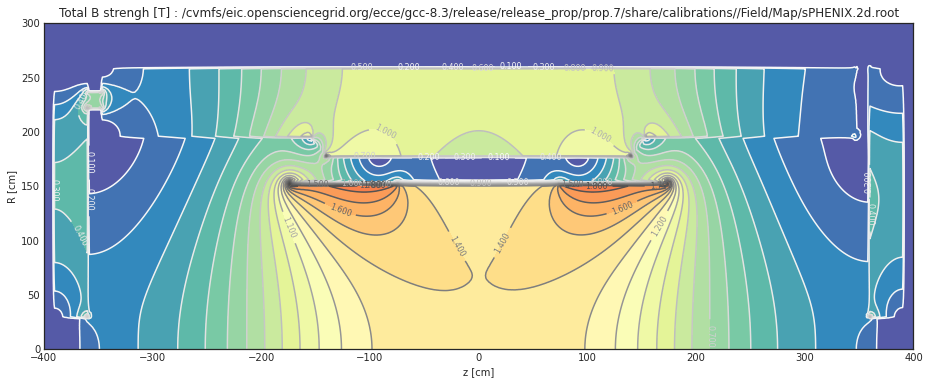

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('z [cm]')
ax.set_ylabel('R [cm]')
ax.set_title("Total B strengh [T] : " + MapFile2D)

fig.show()

In [13]:
df_fieldmap.to_csv('sPHENIX.2d.csv');

# 3D field map

In [14]:
MapFile3D = '/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sphenix3dbigmapxyz.root'

In [38]:
display(Markdown(f'3D field map from `{MapFile3D}`'))

3D field map from `/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sphenix3dbigmapxyz.root`

In [15]:
file = uproot.open(MapFile3D)

In [18]:
df_fieldmap = file['fieldmap'].arrays(library="pd")

In [19]:
df_fieldmap

,x,y,z,bx,by,bz,hz
0,-270.0,-270.0,-330.0,0.001434,0.001430,-0.002762,-0.002762
1,-270.0,-270.0,-328.0,0.001390,0.001386,-0.002795,-0.002795
2,-270.0,-270.0,-326.0,0.001345,0.001341,-0.002826,-0.002826
3,-270.0,-270.0,-324.0,0.001299,0.001295,-0.002855,-0.002855
4,-270.0,-270.0,-322.0,0.001252,0.001248,-0.002881,-0.002881
...,...,...,...,...,...,...,...
24308966,270.0,270.0,322.0,0.001292,0.001240,-0.003005,-0.003005
24308967,270.0,270.0,324.0,0.001341,0.001289,-0.002977,-0.002977
24308968,270.0,270.0,326.0,0.001389,0.001338,-0.002947,-0.002947
24308969,270.0,270.0,328.0,0.001436,0.001385,-0.002915,-0.002915


## Check field map plot

### `x=0` plane

In [20]:
df_fieldmap_yz = df_fieldmap[df_fieldmap['x'] == 0]

In [21]:
df_fieldmap_yz

,x,y,z,bx,by,bz,hz
12109635,0.0,-270.0,-330.0,0.000137,0.009904,-0.092114,-0.092114
12109636,0.0,-270.0,-328.0,0.000332,0.005110,-0.095648,-0.095648
12109637,0.0,-270.0,-326.0,0.000301,0.000888,-0.091804,-0.091804
12109638,0.0,-270.0,-324.0,0.000270,-0.004503,-0.089257,-0.089257
12109639,0.0,-270.0,-322.0,0.000258,-0.010979,-0.088455,-0.088455
...,...,...,...,...,...,...,...
12199331,0.0,270.0,322.0,0.000173,-0.010986,-0.090137,-0.090137
12199332,0.0,270.0,324.0,0.000142,-0.004388,-0.090975,-0.090975
12199333,0.0,270.0,326.0,0.000133,0.001115,-0.093587,-0.093587
12199334,0.0,270.0,328.0,0.000149,0.005438,-0.097469,-0.097469


In [22]:

X=df_fieldmap_yz['z'].values
Y=df_fieldmap_yz['y'].values
Z=df_fieldmap_yz.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values

limits =  np.arange(0,2.5,.1);


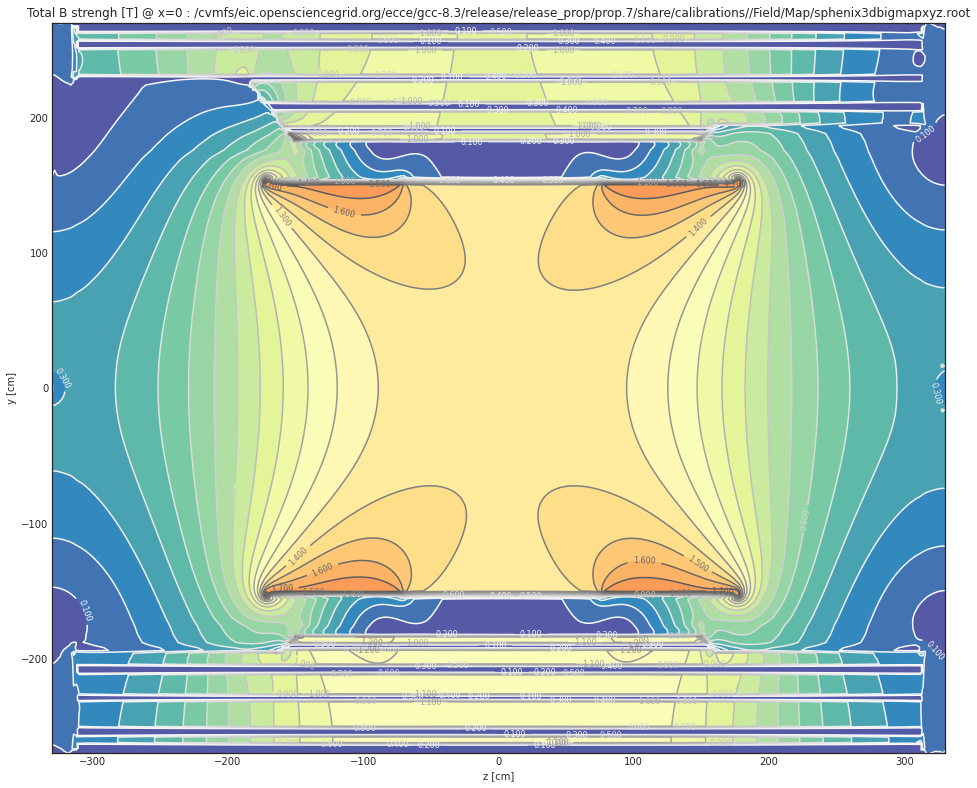

In [23]:
fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('z [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ x=0 : " + MapFile3D)

fig.show()

In [24]:
# df_fieldmap.to_csv('sphenix3dbigmapxyz.csv');

# In steel vs out of steel

Next let's see whether there are sufficient space point around HCal to tell field from in steel vs outside. The stat for field point in the gap is low given the small gap

(ingore the warnings...)

In [25]:
df_fieldmap_xy = df_fieldmap[df_fieldmap['z'] == 0]

df_fieldmap_xy['B_tot']=Z=df_fieldmap_xy.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1)
df_fieldmap_xy['phi_fmod'] = df_fieldmap_xy.apply(lambda x: np.fmod(np.arctan2(x['y'], x['x']) + np.pi, 2.*np.pi/64.), axis=1)
df_fieldmap_xy['X_fold']=df_fieldmap_xy.apply(lambda x: np.cos(x['phi_fmod'])*np.sqrt(x['x']*x['x'] + x['y']*x['y']), axis=1)
df_fieldmap_xy['Y_fold']=Y=df_fieldmap_xy.apply(lambda x: np.sin(x['phi_fmod'])*np.sqrt(x['x']*x['x'] + x['y']*x['y']), axis=1)

<ipython-input-25-60f9851e4785>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fieldmap_xy['B_tot']=Z=df_fieldmap_xy.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1)
<ipython-input-25-60f9851e4785>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fieldmap_xy['phi_fmod'] = df_fieldmap_xy.apply(lambda x: np.fmod(np.arctan2(x['y'], x['x']) + np.pi, 2.*np.pi/64.), axis=1)
<ipython-input-25-60f9851e4785>:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [26]:
X=df_fieldmap_xy['x'].values
Y=df_fieldmap_xy['y'].values
Z=df_fieldmap_xy.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values

The field in HCal is definitely sparse, if looking at the whole transverse cut away: 

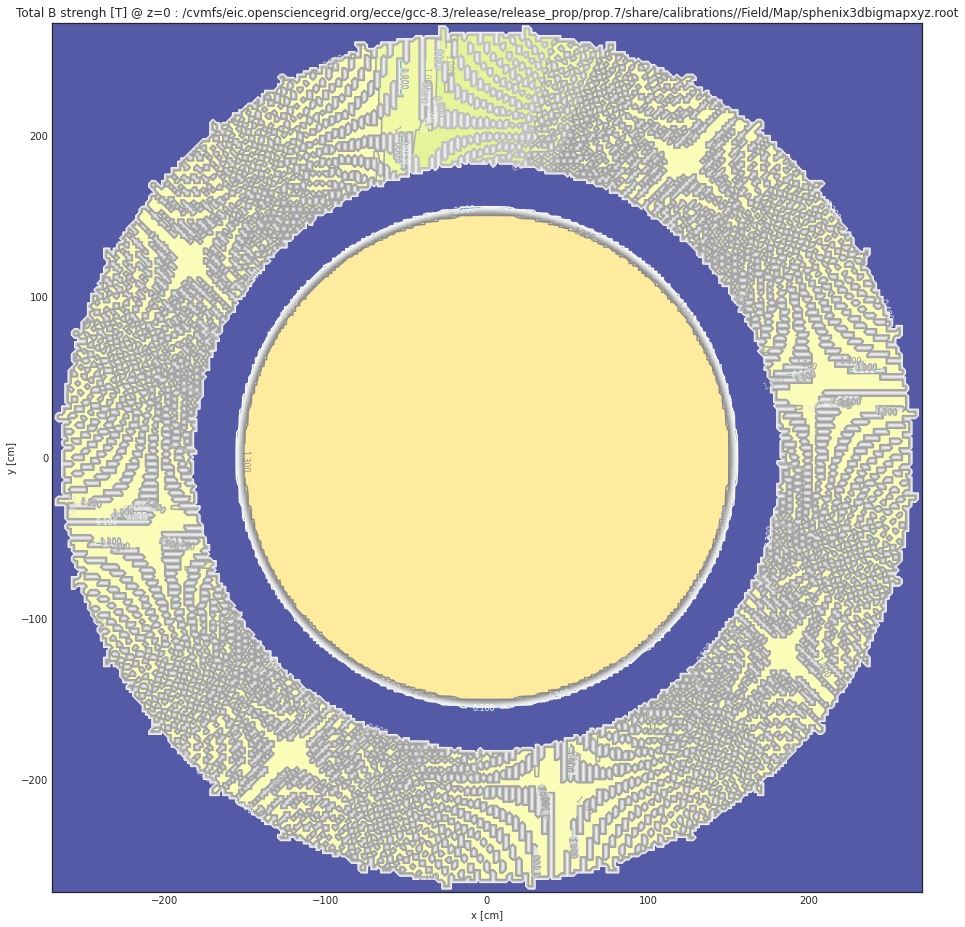

In [27]:
limits =  np.arange(0,2.5,.1);

fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ z=0 : " + MapFile3D)

fig.show()

## Check: folding data azimuthally to one sector

Next trick is for `z=0` plane, we can fold the HCal azimuthally 64 times to look at one sector. Then we have much better sampling of the space point

In [28]:



limits =  np.arange(0,2.5,.1);

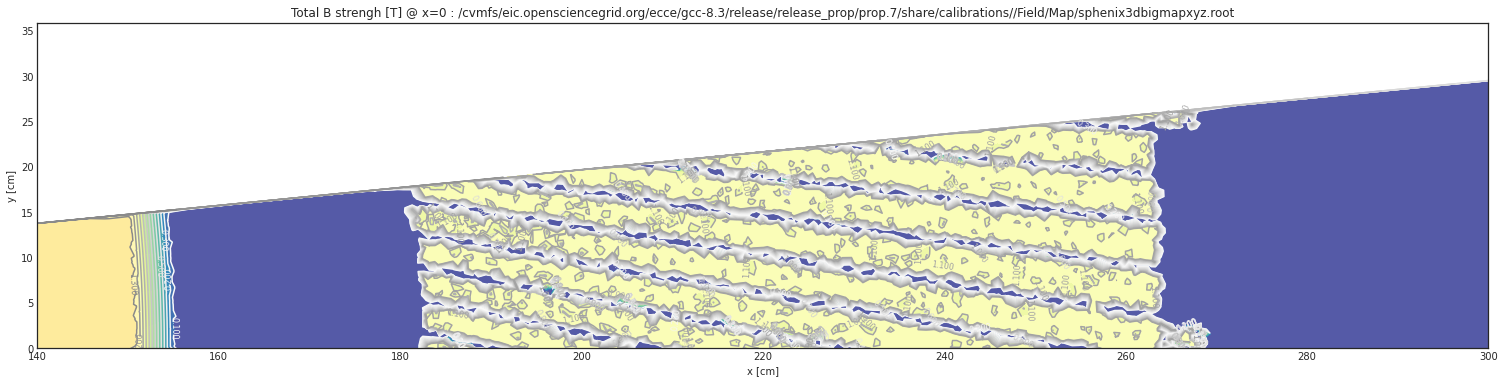

In [29]:
fig, ax = plt.subplots(figsize=(26,16))
ax.set_aspect('equal')
ax.tricontourf(df_fieldmap_xy['X_fold'].values,df_fieldmap_xy['Y_fold'].values,df_fieldmap_xy['B_tot'].values,limits, cmap='Spectral_r') 
contours = ax.tricontour(df_fieldmap_xy['X_fold'].values,df_fieldmap_xy['Y_fold'].values,df_fieldmap_xy['B_tot'].values, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ x=0 : " + MapFile3D)
ax.set_xlim([140, 300])

fig.show()

In [30]:
df_fieldmap_xy

,x,y,z,bx,by,bz,hz,B_tot,phi_fmod,X_fold,Y_fold
165,-270.0,-270.0,0.0,0.000046,0.000040,-0.001267,-0.001267,0.001269,0.000000,381.837662,0.000000
496,-270.0,-268.0,0.0,0.000046,0.000040,-0.001263,-0.001263,0.001265,0.094457,378.730223,35.880615
827,-270.0,-266.0,0.0,0.000047,0.000040,-0.001259,-0.001259,0.001260,0.090712,377.461436,34.334594
1158,-270.0,-264.0,0.0,0.000047,0.000041,-0.001254,-0.001254,0.001256,0.086939,376.192649,32.788573
1489,-270.0,-262.0,0.0,0.000048,0.000041,-0.001250,-0.001250,0.001252,0.083138,374.923863,31.242552
...,...,...,...,...,...,...,...,...,...,...,...
24307481,270.0,262.0,0.0,0.000003,-0.000093,-0.001259,-0.001259,0.001262,0.083138,374.923863,31.242552
24307812,270.0,264.0,0.0,0.000004,-0.000092,-0.001263,-0.001263,0.001266,0.086939,376.192649,32.788573
24308143,270.0,266.0,0.0,0.000006,-0.000091,-0.001267,-0.001267,0.001270,0.090712,377.461436,34.334594
24308474,270.0,268.0,0.0,0.000007,-0.000091,-0.001271,-0.001271,0.001274,0.094457,378.730223,35.880615


The separation of the field in gap (<0.1 T) and in steel (>0.1 T) is very clear 

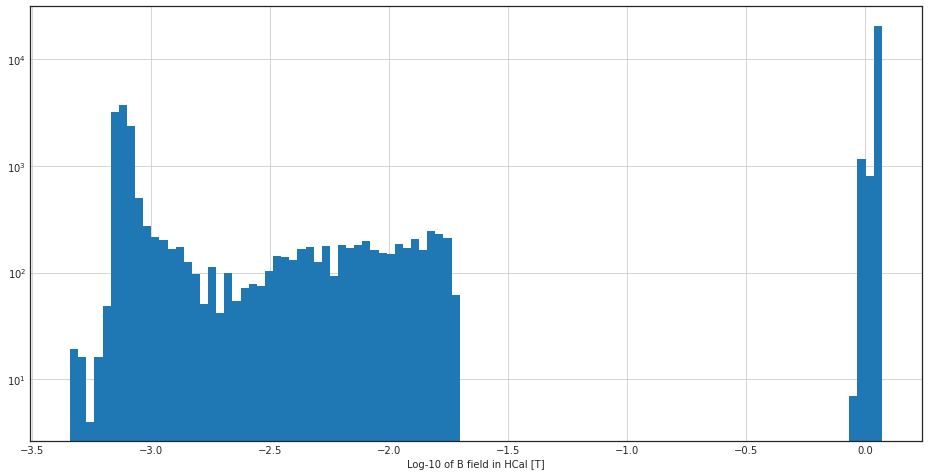

In [31]:
fig, ax = plt.subplots(figsize=(16,8))

hist = df_fieldmap_xy[(df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)].apply(lambda x: np.log10(x['B_tot']), axis=1).hist(bins=100)
ax.set_xlabel('Log-10 of B field in HCal [T]');
ax.set_yscale('log')

Now perform the separation according the field value. We can get two maps, one for in-steel, one outside for one sector. 

In [32]:
df_fieldmap_xy_steel = df_fieldmap_xy[(df_fieldmap_xy['B_tot'] > 0.1)  & (df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)]
df_fieldmap_xy_gap = df_fieldmap_xy[(df_fieldmap_xy['B_tot'] < 0.1)  & (df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)]

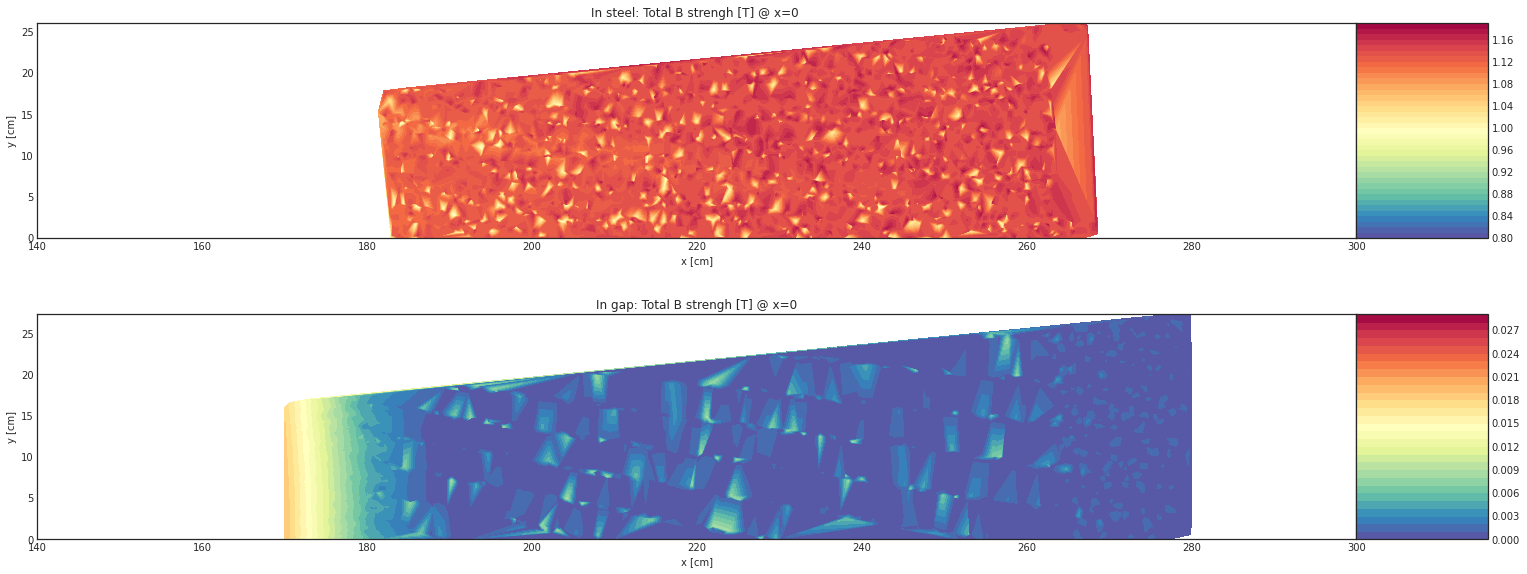

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(26,10))

ax = axs[0];

limits =  np.arange(.8,1.2,.01);
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_steel['X_fold'].values,df_fieldmap_xy_steel['Y_fold'].values,df_fieldmap_xy_steel['B_tot'].values,limits, cmap='Spectral_r') 
# contours = ax.tricontour(df_fieldmap_xy_steel['X_fold'].values,df_fieldmap_xy_steel['Y_fold'].values,df_fieldmap_xy_steel['B_tot'].values, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In steel: Total B strengh [T] @ x=0 " )
ax.set_xlim([140, 300])

ax = axs[1];

limits =  np.arange(0,.03,.001);
ax.set_aspect('equal')
tcf= ax.tricontourf(df_fieldmap_xy_gap['X_fold'].values,df_fieldmap_xy_gap['Y_fold'].values,df_fieldmap_xy_gap['B_tot'].values,limits, cmap='Spectral_r') 
# contours = ax.tricontour(df_fieldmap_xy_gap['X_fold'].values,df_fieldmap_xy_gap['Y_fold'].values,df_fieldmap_xy_gap['B_tot'].values, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In gap: Total B strengh [T] @ x=0")
ax.set_xlim([140, 300])

fig.show()

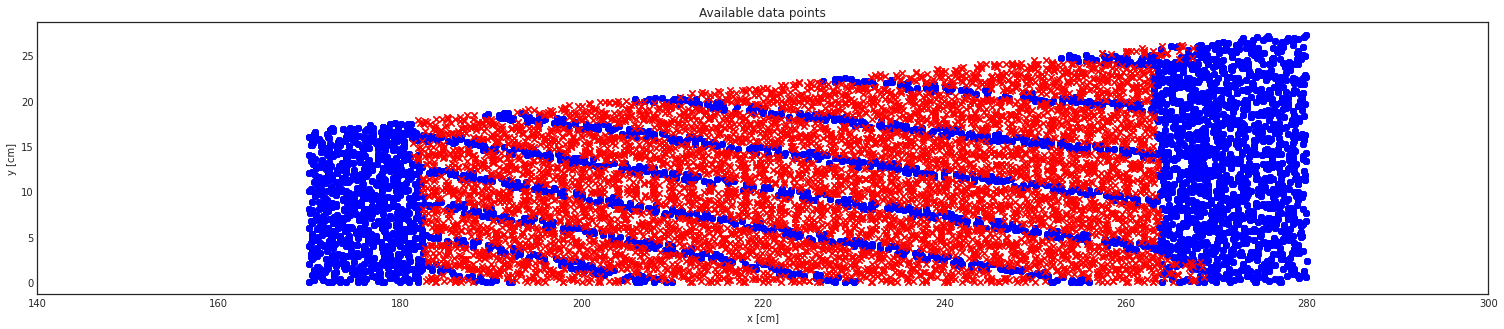

In [34]:
fig, ax = plt.subplots(figsize=(26,16))
ax.set_aspect('equal')
ax.plot(df_fieldmap_xy_gap['X_fold'], df_fieldmap_xy_gap['Y_fold'], 'o', color='blue')
ax.plot(df_fieldmap_xy_steel['X_fold'], df_fieldmap_xy_steel['Y_fold'], 'x', color='red')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Available data points")
ax.set_xlim([140, 300])

fig.show()

## Rebuild map with in/out steel separation

(TBC)

In [35]:
# df_fieldmap['R'] = df_fieldmap.apply(
#     lambda x: np.sqrt(x['x']*x['x'] + x['y']*x['y'])
#     , axis=1)




In [36]:
# df_fieldmap['In_Steel'] = df_fieldmap.apply(
#     lambda x: (df_fieldmap_xy[(df_fieldmap_xy['x'] == x['x']) & (df_fieldmap_xy['y'] == x['y'])]['B_tot'].mean() > 0.1) & (x['R'] >=170) & ( x['R'] <=280)
#     , axis=1)

In [37]:
# df_fieldmap_steel = df_fieldmap.copy(deep=True)
# df_fieldmap_gap = df_fieldmap.copy(deep=True)